## Phase covariant - jumps not in the $\sigma_z$ eigenvalues
Assuming a pre-jump state $|\psi> = \alpha|g>+\sqrt{1-\alpha^2}|e>$.
Unraveling with $$\mathbf C(\alpha,t) = x\sigma_x + y\sigma_y + z\sigma_z + \mu \mathbb 1,$$
with the coefficients depending on $\alpha$ and on $t$.
Imposing that $\mathbf R^\prime_{|\psi><\psi|}$ has eigenstates $|\pm>$, is equivalent to 
$$\mathbf R^\prime_{|\psi><\psi|} = c_1 \mathbb 1 + c_2 \sigma_x,$$
fixing the parameters $y,z$.


The eigenvalues of $\mathbf R^\prime_{|\psi><\psi|}$ are $\lambda_\pm = c_1\pm c_2$. Using $-\frac12\sqrt{\gamma_-\gamma_+}\le \gamma_z \le 0$, then $ \lambda_\pm \ge \lambda_\pm^{lb} $. Setting $\lambda_\pm^{lb}\ge 0$, giving as a solution $x\in[0,x^{ub}]$, $\mu\in[0,\mu^{ub}]$, with $x^{ub},\mu^{ub}\ge0$.
Then it is enough picking $x=\mu=0$, giving
$$\mathbf C(\alpha,t) = \left[\gamma_-(1-a^{2})-\gamma_+a^2+\gamma_z(2a^2-1)\right]\sigma_z.$$


Note: in general, $|\pm>$ are not steady states under the no-jump evolution. In fact, assuming $H = b(t)\sigma_x$,
$$K = b(t)\sigma_x-\frac i2 \Gamma - \frac i2 C,\qquad \Gamma = \left(\gamma_z+\frac{\gamma_-+\gamma_+}2\right)\mathbb 1 + \frac{\gamma_--\gamma_+}2\sigma_z,$$
whose eigenstates are $|g>$ and $|e>$. Therefore, the effective ensemble size is not reduced.

In particular,
$$ |+>\mapsto \left[1-i b(t) dt - \left(\gamma_z - \frac{\gamma_-+\gamma_+}2\right)\right]|+> - \frac{\gamma_--\gamma_+}2|->.$$
Therefore, whenever $\gamma_+=\gamma_-$, $|+>$ is still an eigenstate. The eternally non-Markovian is a particular case.

### Examples
Eternally non-Markovian, undriven
$$\gamma_+(t)=\gamma_-(t)=1,\qquad\gamma_z(t) = -\frac12\tanh(t), \qquad H=0$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

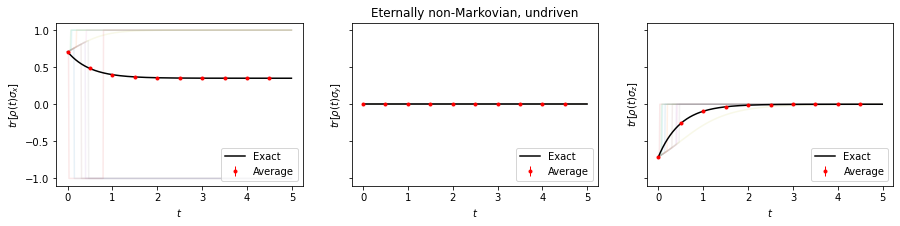

In [4]:
filein = open("../params.txt")
Ncopies = int(filein.readline())
Nensemble = int(filein.readline())
ti = float(filein.readline())
tf = float (filein.readline())
dt = float(filein.readline())
print_traj = bool(filein.readline())
Ntraj = int(filein.readline())
dimH = int(filein.readline())
Npoints = int((tf-ti)/dt)

t = np.arange(ti,tf,dt)

fig, ax = plt.subplots(1,3, figsize=(15,3), sharey=True)
for i in range(3):
    trajectories = np.zeros((Ntraj, Npoints))
    exact = np.zeros(Npoints)
    avg_obs = np.zeros(Npoints)
    err_obs = np.zeros(Npoints)
    filein = open("../trajectories_"+str(i+1)+".txt")
    f_exact = open("../analytic_"+str(i+1)+".txt")
    f_avg = open("../average_"+str(i+1)+".txt")
    f_err = open("../error_"+str(i+1)+".txt")
    for k in range(Npoints):
        exact[k] = f_exact.readline()
        avg_obs[k] = f_avg.readline()
        err_obs[k] = f_err.readline()
        j = 0
        line = filein.readline()
        for x in line.split():
            trajectories[j,k] = x
            j+=1
    for itraj in range(Ntraj):
        ax[i].plot(t, trajectories[itraj,:], alpha=.1)
    ax[i].plot(t,exact,color='black', label="Exact")
    ax[i].errorbar(t,avg_obs,err_obs, marker='o', markersize=3, color='red', label="Average", errorevery=50, markevery=50, linewidth=0, elinewidth=1)

    ax[i].legend(loc="lower right")
    ax[i].set_xlabel(r'$t$')
    
ax[0].set_ylabel(r'$tr[\rho(t)\sigma_x]$')
ax[1].set_ylabel(r'$tr[\rho(t)\sigma_y]$')
ax[2].set_ylabel(r'$tr[\rho(t)\sigma_z]$')
ax[1].set_title("Eternally non-Markovian, undriven")

plt.show();   

Also works fine if we add a driving $H(t) = b(t)\sigma_x$

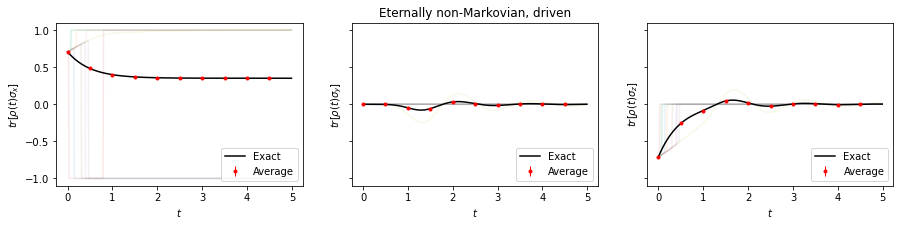

In [6]:
filein = open("../params.txt")
Ncopies = int(filein.readline())
Nensemble = int(filein.readline())
ti = float(filein.readline())
tf = float (filein.readline())
dt = float(filein.readline())
print_traj = bool(filein.readline())
Ntraj = int(filein.readline())
dimH = int(filein.readline())
Npoints = int((tf-ti)/dt)

t = np.arange(ti,tf,dt)

fig, ax = plt.subplots(1,3, figsize=(15,3), sharey=True)
for i in range(3):
    trajectories = np.zeros((Ntraj, Npoints))
    exact = np.zeros(Npoints)
    avg_obs = np.zeros(Npoints)
    err_obs = np.zeros(Npoints)
    filein = open("../trajectories_"+str(i+1)+".txt")
    f_exact = open("../analytic_"+str(i+1)+".txt")
    f_avg = open("../average_"+str(i+1)+".txt")
    f_err = open("../error_"+str(i+1)+".txt")
    for k in range(Npoints):
        exact[k] = f_exact.readline()
        avg_obs[k] = f_avg.readline()
        err_obs[k] = f_err.readline()
        j = 0
        line = filein.readline()
        for x in line.split():
            trajectories[j,k] = x
            j+=1
    for itraj in range(Ntraj):
        ax[i].plot(t, trajectories[itraj,:], alpha=.1)
    ax[i].plot(t,exact,color='black', label="Exact")
    ax[i].errorbar(t,avg_obs,err_obs, marker='o', markersize=3, color='red', label="Average", errorevery=50, markevery=50, linewidth=0, elinewidth=1)

    ax[i].legend(loc="lower right")
    ax[i].set_xlabel(r'$t$')
    
ax[0].set_ylabel(r'$tr[\rho(t)\sigma_x]$')
ax[1].set_ylabel(r'$tr[\rho(t)\sigma_y]$')
ax[2].set_ylabel(r'$tr[\rho(t)\sigma_z]$')
ax[1].set_title("Eternally non-Markovian, driven")

plt.show();   